# $\mathrm{BIACET}$ (Biacetyl)

In [1]:
using Pkg 
Pkg.activate("../")

  Activating project at `~/gitrepos/activepure/Photolysis.jl/mcm`


In [2]:
using Plots, MLPlotRecipes
using HDF5
using Tables, DataFrames, CSV
using MLJ, MLJGaussianProcesses
using StatsBase 
using KernelFunctions
using ParameterHandling

In [3]:
include("./utils.jl")

filter_outliers (generic function with 1 method)

In [4]:
# load in spectrometer data
hr4000_df = CSV.File("../hr4000_wavelengths.txt") |> DataFrame ; 

# Model Evaluation

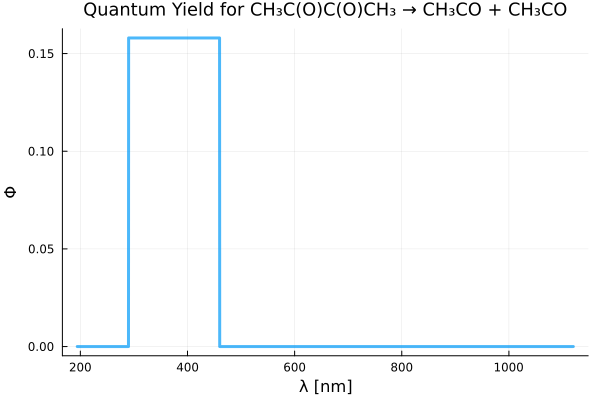

In [5]:
λ = hr4000_df.λ
Φ = zeros(size(λ))

idxs = [idx for idx ∈ 1:size(λ,1) if λ[idx] ≥ 290.0 && λ[idx] ≤ 460.0 ]
Φ[idxs] .= 0.158



p = plot(
    λ,
    Φ,
    xlabel="λ [nm]",
    ylabel="Φ",
    alpha=0.7,
    lw=3,
    label="",
    title="Quantum Yield for CH₃C(O)C(O)CH₃ → CH₃CO + CH₃CO",
    titlefontsize=12,
)

# Output for Photolysis Rate Determination

In [6]:
df_photolysis_Φ = CSV.File("../photolysis_Φ.csv") |> DataFrame;

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64
4,Φ_4,0.214167,0.0,0.0,1.0,0,Float64
5,Φ_6,0.426121,0.0,0.0,1.0,0,Float64
6,Φ_5,0.00986771,0.0,0.0,0.344696,0,Float64
7,Φ_7,0.211623,0.0,0.0,1.0,0,Float64
8,Φ_8,0.945175,0.0,1.0,1.0,0,Float64
9,Φ_11,0.0470227,0.0,0.0,0.73106,0,Float64


In [7]:
df_photolysis_Φ.Φ_35 = Φ

describe(df_photolysis_Φ)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Φ_1,0.114981,0.0,0.0,1.0,0,Float64
2,Φ_2,0.885019,0.0,1.0,1.0,0,Float64
3,Φ_3,0.963542,0.0,1.0,1.0,0,Float64
4,Φ_4,0.214167,0.0,0.0,1.0,0,Float64
5,Φ_6,0.426121,0.0,0.0,1.0,0,Float64
6,Φ_5,0.00986771,0.0,0.0,0.344696,0,Float64
7,Φ_7,0.211623,0.0,0.0,1.0,0,Float64
8,Φ_8,0.945175,0.0,1.0,1.0,0,Float64
9,Φ_11,0.0470227,0.0,0.0,0.73106,0,Float64


In [8]:
CSV.write("../photolysis_Φ.csv", df_photolysis_Φ)

"../photolysis_Φ.csv"